# Figure 1

The following code can be used to reproduce elements from Figure 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from mpl_toolkits.mplot3d import Axes3D

from dtw_gi import dtw_gi, stiefel_uniform_npy
from utils import plot_trajectory, make_one_folium, get_rot2d, get_rot3d

torch.manual_seed(0)


# Generate 2 folium-like trajectories (one is 2d, one is 3d)
f = lambda t: t ** 2
f2 = lambda t: np.sin(np.pi / 2 * t)

sz = 30

trajectory = make_one_folium(sz=sz, noise=0.,
                             resample_fun=f).dot(get_rot2d(-np.pi / 3))
folium = np.zeros((sz, 3))
folium[:, :2] = make_one_folium(sz=sz, noise=0., resample_fun=f2)
rotated_trajectory = folium.dot(get_rot3d(np.pi / 3,
                                          np.pi / 3,
                                          np.pi / 3))

# Perform alignment
init_p = stiefel_uniform_npy((3, 2))
pi_fdtw, p_fdtw, cost = dtw_gi(rotated_trajectory, trajectory, max_iter=5000,
                               init_p=init_p, use_bias=False,
                               return_matrix=False)

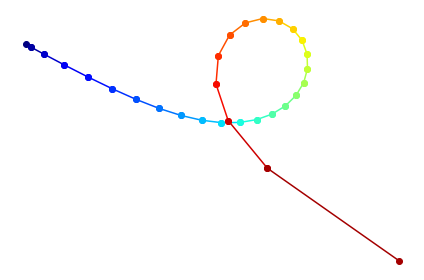

In [2]:
# Save figures
fig_size = (6, 4)
fig = plt.figure(figsize=fig_size)
ax = fig.gca()
plot_trajectory(trajectory, ax)
plt.axis('off')
plt.tight_layout()

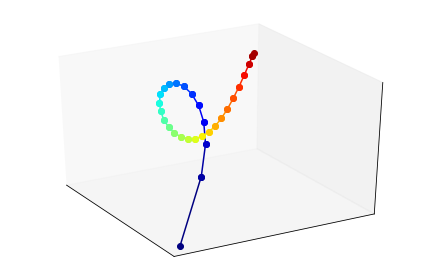

In [3]:
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(111, projection='3d')
plot_trajectory(rotated_trajectory, ax, plot_3d=True)
ax.view_init(azim=-30)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.tight_layout()

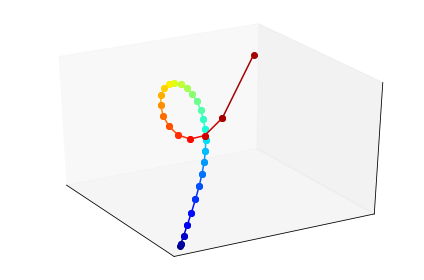

In [4]:
# This one is the 2d trajectory embedded to 3d space using learned function f
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(111, projection='3d')
plot_trajectory(trajectory.dot(p_fdtw.T), ax, plot_3d=True)
ax.view_init(azim=-30)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.tight_layout()

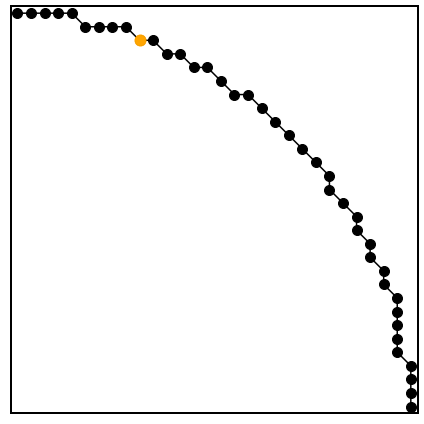

In [5]:
# Save DTW-GI path
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
marker_size = 10
ax.plot([w_y for (w_x, w_y) in pi_fdtw],
        [sz - w_x for (w_x, w_y) in pi_fdtw],
        'ko-', markersize=marker_size)
ax.plot([9], [sz - 2], 'o-', c='orange', markersize=marker_size + 1)
xmin, xmax = min([w_y for (w_x, w_y) in pi_fdtw]), \
             max([w_y for (w_x, w_y) in pi_fdtw])
ymin, ymax = sz - max([w_x for (w_x, w_y) in pi_fdtw]), \
             sz - min([w_x for (w_x, w_y) in pi_fdtw])
ax.set_xlim(xmin - .5, xmax + .5)
ax.set_ylim(ymin - .5, ymax + .5)
ax.set_xticks([])
ax.set_yticks([])
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.)
plt.tight_layout()